## Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Input, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('/content/zomato.csv', encoding='latin-1')

In [3]:
df



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Creating a copy of the dataframe

In [5]:
df_copy = df.copy()

## Getting rid of columns which do not provide predictive power and understanding every column

Restaurant ID

In [6]:
df['Restaurant ID'].nunique()

9551

Comments - Since all the restaurant ID's are unique they do not provide any predictive power while prediction of the output, we will drop it.

In [7]:
df.drop('Restaurant ID', axis=1, inplace=True)

Restaurant Name

In [8]:
df['Restaurant Name'].nunique()

7446

Comments - Even though restaurant chains do have a influence on the pricing like a pizza at Domino's will be more expensive that at a local pizza chain. Yet we do not have a significantly less amount of restaurants to encode, we cannot encode over 7000+ restaurants. It is as good as unique values, hence we will get rid of this column as well.

In [9]:
df['Restaurant Name'].value_counts()

,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Odeon Social,1
Johnny Rockets,1
House of Commons,1


In [10]:
df.drop('Restaurant Name', axis=1, inplace=True)

Country Code

In [11]:
df['Country Code'].value_counts()

,count
Country Code,
1,8652
216,434
215,80
30,60
214,60
189,60
148,40
208,34
14,24


Comments - Country code seems to be biased as the most number of restaurants in this dataset are Indian hence the code 1 is appearing so many times.  Since we need this column as it affects the pricing of the restaurant, we will keep this column and encode it categorically.

In [12]:
df['Country Code']

,Country Code
0,162
1,162
2,162
3,162
4,162
...,...
9546,208
9547,208
9548,208
9549,208


In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

df['Country Code Encoded'] = label_encoder.fit_transform(df['Country Code'])

country_code_mapping = dict(zip(df['Country Code'], df['Country Code Encoded']))
for country_code, encoded_label in country_code_mapping.items():
    print(f"Country Code {country_code}: Encoded Label {encoded_label}")


Country Code 162: Encoded Label 6
Country Code 30: Encoded Label 2
Country Code 216: Encoded Label 14
Country Code 14: Encoded Label 1
Country Code 37: Encoded Label 3
Country Code 184: Encoded Label 8
Country Code 214: Encoded Label 12
Country Code 1: Encoded Label 0
Country Code 94: Encoded Label 4
Country Code 148: Encoded Label 5
Country Code 215: Encoded Label 13
Country Code 166: Encoded Label 7
Country Code 189: Encoded Label 9
Country Code 191: Encoded Label 10
Country Code 208: Encoded Label 11


In [15]:
df['Country Code Encoded'].nunique()

15

In [16]:
df['Country Code Encoded'].value_counts()

,count
Country Code Encoded,
0,8652
14,434
13,80
2,60
12,60
9,60
5,40
11,34
1,24


In [17]:
df.drop('Country Code', axis=1, inplace=True)

In [18]:
df['City'].value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Panchkula,1
Mc Millan,1
Mayfield,1


Comments - This time we will go for target encoding, since there are too many values to encode. Target encoding will capture the relationship between the City and the Target variables as it is logical that Cities impact the prices of food.

In [20]:
city_avg_cost_mean = df.groupby('City')['Average Cost for two'].mean()

df['City Encoded for Cost'] = df['City'].map(city_avg_cost_mean)


In [21]:
df.drop('City', axis=1, inplace=True)

Address

Comments - City column won't usually capture the information at a micro level as Address, but as the address have around 9000 unique values, it is not as useful to us as it should be, hence we can get rid of the column.

In [22]:
df['Address'].nunique()

8918

In [23]:
df.drop('Address', axis=1, inplace=True)

Locality

In [24]:
df['Locality'].value_counts()

,count
Locality,
Connaught Place,122
Rajouri Garden,99
Shahdara,87
Defence Colony,86
Malviya Nagar,85
...,...
"Lemon Tree Premier, Sector 29",1
"Omaxe Celebration Mall, Sohna Road, Gurgaon",1
"Park Inn, Sector 15, Gurgaon",1


Comments - For now we will get rid of the Locality column as it might introduce more noise than information with it's 1208 unique values.

In [25]:
df.drop('Locality', axis=1, inplace=True)

In [26]:
df['Locality Verbose'].value_counts()

,count
Locality Verbose,
"Connaught Place, New Delhi",122
"Rajouri Garden, New Delhi",99
"Shahdara, New Delhi",87
"Defence Colony, New Delhi",86
"Pitampura, New Delhi",85
...,...
"Ramada Gurgaon Central, Sector 44, Gurgaon",1
"Sector 5, Gurgaon",1
"Sector 53, Gurgaon",1


Comments - For now we will get rid of the Locality Verbose column as it might introduce more noise than information with it's 1265 unique values.

In [27]:
df.drop('Locality Verbose', axis=1, inplace=True)

Cuisines

In [28]:
df['Cuisines'].value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Bengali, Fast Food",1
"North Indian, Rajasthani, Asian",1
"Chinese, Thai, Malaysian, Indonesian",1


In [29]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [31]:
df['Cuisines_split'] = df['Cuisines'].str.split(', ')

all_cuisines = df['Cuisines_split'].explode().unique().tolist()

print(all_cuisines)

len(all_cuisines)

['French', 'Japanese', 'Desserts', 'Seafood', 'Asian', 'Filipino', 'Indian', 'Sushi', 'Korean', 'Chinese', 'European', 'Mexican', 'American', 'Ice Cream', 'Cafe', 'Italian', 'Pizza', 'Bakery', 'Mediterranean', 'Fast Food', 'Brazilian', 'Arabian', 'Bar Food', 'Grill', 'International', 'Peruvian', 'Latin American', 'Burger', 'Juices', 'Healthy Food', 'Beverages', 'Lebanese', 'Sandwich', 'Steak', 'BBQ', 'Gourmet Fast Food', 'Mineira', 'North Eastern', nan, 'Coffee and Tea', 'Vegetarian', 'Tapas', 'Breakfast', 'Diner', 'Southern', 'Southwestern', 'Spanish', 'Argentine', 'Caribbean', 'German', 'Vietnamese', 'Thai', 'Modern Australian', 'Teriyaki', 'Cajun', 'Canadian', 'Tex-Mex', 'Middle Eastern', 'Greek', 'Bubble Tea', 'Tea', 'Australian', 'Fusion', 'Cuban', 'Hawaiian', 'Salad', 'Irish', 'New American', 'Soul Food', 'Turkish', 'Pub Food', 'Persian', 'Continental', 'Singaporean', 'Malay', 'Cantonese', 'Dim Sum', 'Western', 'Finger Food', 'British', 'Deli', 'Indonesian', 'North Indian', 'Mugh

146

Comment - Since there are 146 unique values. We will use embedding to capture relationships between the Cuisines, this we will do by adding an embedding layer at the start of our model. We will use the Functional API to create a model.

In [32]:
df.drop('Cuisines_split', axis=1, inplace=True)

In [33]:
df = df.dropna(subset=['Cuisines'])

Average Cost for two

In [34]:
df['Average Cost for two'].value_counts()

,count
Average Cost for two,
500,900
300,897
400,857
200,687
600,652
...,...
8000,1
2350,1
150000,1


Comments - We will retain our target column as it is for now.

Currency

In [35]:
df['Currency'].value_counts()

,count
Currency,
Indian Rupees(Rs.),8652
Dollar($),473
Pounds(£),80
Brazilian Real(R$),60
Emirati Diram(AED),60
Rand(R),60
NewZealand($),40
Turkish Lira(TL),34
Botswana Pula(P),22


In [36]:
df['Currency'].nunique()

12

Comments - We will use this column to change all the values in the Average cost for two to convert all the values to INR. Since target variables should have the same scale, the model won't be able to predict if they are on different scale. Also scaling it to the same currency value will ensure that the number of outliers will be reduced. Also the Price Range column will make sense as it might be the case that it shows 1 value for a higher number and 4 values for a lower number when the currencies are different.

In [37]:
exchange_rates_to_inr = {
    'Indian Rupees(Rs.)': 1.0,
    'Dollar($)': 83.87,
    'Pounds(£)': 110.62,
    'Brazilian Real(R$)': 15.08,
    'Emirati Diram(AED)': 22.84,
    'Rand(R)': 4.75,
    'NewZealand($)': 51.91,
    'Turkish Lira(TL)': 2.47,
    'Botswana Pula(P)': 6.30,
    'Indonesian Rupiah(IDR)': 0.0055,
    'Qatari Rial(QR)': 23.0,
    'Sri Lankan Rupee(LKR)': 0.28
}

def convert_to_inr(value, currency):
    rate = exchange_rates_to_inr.get(currency, None)
    if rate is None:
        raise ValueError(f"Conversion rate for currency '{currency}' not found.")
    return value * rate

df['Average Cost for two (INR)'] = df.apply(lambda row: convert_to_inr(row['Average Cost for two'], row['Currency']), axis=1)


<ipython-input-37-2be9e29bfe73>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Cost for two (INR)'] = df.apply(lambda row: convert_to_inr(row['Average Cost for two'], row['Currency']), axis=1)


In [38]:
df

,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Code Encoded,City Encoded for Cost,Average Cost for two (INR)
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,6,1150.000000,6930.00
1,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,6,1150.000000,7560.00
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,6,2000.000000,25200.00
3,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,6,2000.000000,9450.00
4,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,6,2000.000000,9450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,11,81.428571,197.60
9547,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,11,81.428571,259.35
9548,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,11,81.428571,419.90
9549,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,11,81.428571,296.40


In [39]:
df.drop('Currency', axis=1, inplace=True)

<ipython-input-39-1c9be60cdd67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Currency', axis=1, inplace=True)


Has table booking

In [40]:
df['Has Table booking'].value_counts()

,count
Has Table booking,
No,8384
Yes,1158


In [41]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

<ipython-input-41-3b51015f3dec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})


Has online Delivery

In [42]:
df['Has Online delivery'].value_counts()

,count
Has Online delivery,
No,7091
Yes,2451


In [43]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

<ipython-input-43-42087eec4e0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


Is delivering now

In [44]:
df['Is delivering now'].value_counts()

,count
Is delivering now,
No,9508
Yes,34


In [45]:
df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

<ipython-input-45-662974137aab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})


Switch to order menu

In [46]:
df['Switch to order menu'].value_counts()

,count
Switch to order menu,
No,9542


Comments- There is only 1 value in this entire column we can drop it as it provides no information about the target variable.

In [47]:
df.drop('Switch to order menu', axis=1, inplace=True)

<ipython-input-47-660245d1a271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Switch to order menu', axis=1, inplace=True)


Aggregate rating

In [48]:
df['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,495
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


Rating color

In [49]:
df['Rating color'].value_counts()

,count
Rating color,
Orange,3734
White,2148
Yellow,2096
Green,1078
Dark Green,300
Red,186


Comments - We will drop the Rating color column as it resembles Rating text, so we can delete this column.

In [50]:
df.drop('Rating color', axis=1, inplace=True)

<ipython-input-50-058c584f97b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Rating color', axis=1, inplace=True)


Rating text

In [51]:
df['Rating text'].value_counts()

,count
Rating text,
Average,3734
Not rated,2148
Good,2096
Very Good,1078
Excellent,300
Poor,186


Comments - It is very obvious that this column has an Ordinal relationship, hence we can convert this into a categorical column.

In [52]:
df['Rating text'] = df['Rating text'].map({'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5})

<ipython-input-52-d6c3240322c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating text'] = df['Rating text'].map({'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5})


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude                   9542 non-null   float64
 1   Latitude                    9542 non-null   float64
 2   Cuisines                    9542 non-null   object 
 3   Average Cost for two        9542 non-null   int64  
 4   Has Table booking           9542 non-null   int64  
 5   Has Online delivery         9542 non-null   int64  
 6   Is delivering now           9542 non-null   int64  
 7   Price range                 9542 non-null   int64  
 8   Aggregate rating            9542 non-null   float64
 9   Rating text                 9542 non-null   int64  
 10  Votes                       9542 non-null   int64  
 11  Country Code Encoded        9542 non-null   int64  
 12  City Encoded for Cost       9542 non-null   float64
 13  Average Cost for two (INR)  9542 non-n

## Setting aside Train set and Test set

In [54]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## Visualizations and Descriptions

In [55]:
train_df.describe()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country Code Encoded,City Encoded for Cost,Average Cost for two (INR)
count,7633.000000,7633.000000,7633.00000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000,7633.000000
mean,64.188787,25.765445,1216.65754,0.119350,0.253374,0.003537,1.801782,2.667889,2.073759,158.407572,1.003930,1221.292739,835.429498
std,41.367934,11.134958,16980.23684,0.324221,0.434971,0.059374,0.908922,1.517401,1.369281,439.881202,3.399768,13707.576806,1318.112539
min,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,77.081113,28.477505,250.00000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,5.000000,0.000000,596.088069,300.000000
50%,77.192413,28.570270,400.00000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,31.000000,0.000000,596.088069,500.000000
75%,77.281595,28.642562,700.00000,0.000000,1.000000,0.000000,2.000000,3.700000,3.000000,129.000000,0.000000,596.088069,838.700000
max,174.832089,55.976644,800000.00000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,10934.000000,14.000000,308437.500000,36064.100000


Visualizations

Geographical distribution of Restaurants

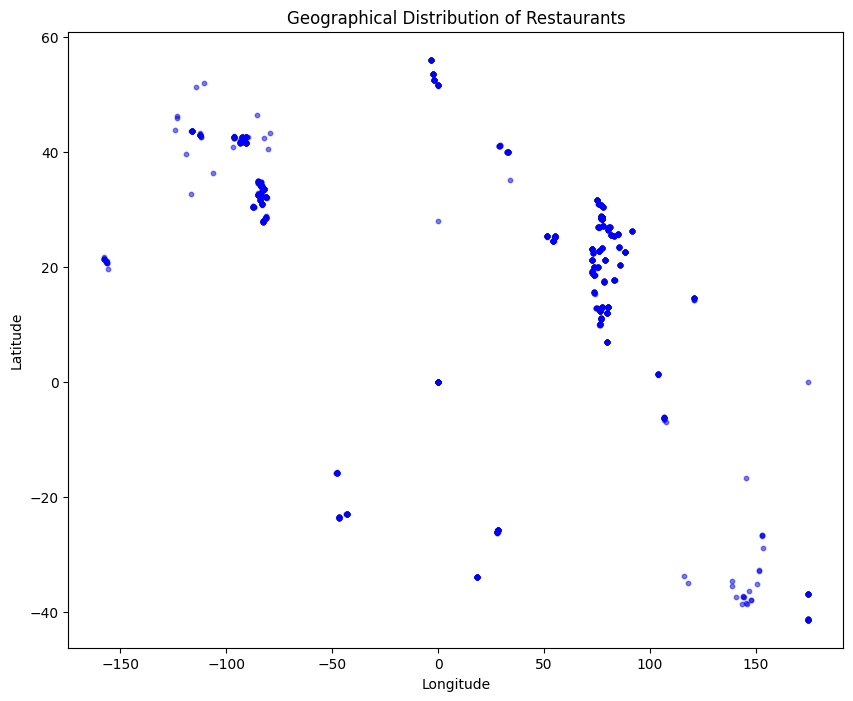

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(train_df['Longitude'], train_df['Latitude'], alpha=0.5, c='blue', s=10)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Cost vs Rating

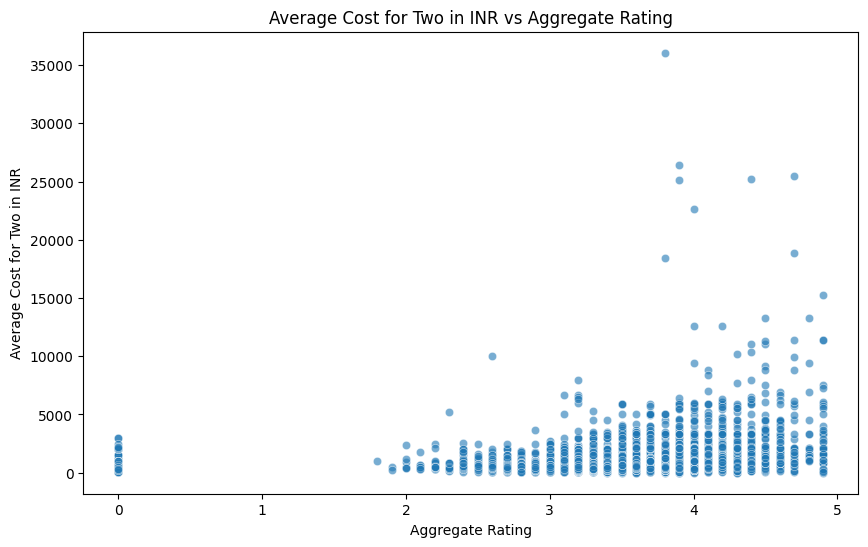

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Average Cost for two (INR)', data=train_df, alpha=0.6)
plt.title('Average Cost for Two in INR vs Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two in INR')
plt.show()


Average Cost by Price range

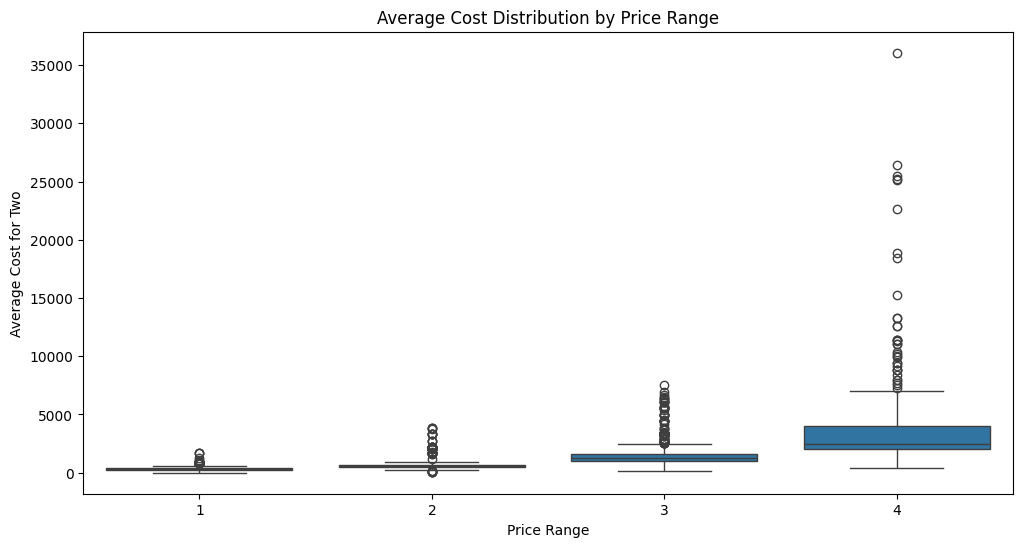

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Average Cost for two (INR)', data=train_df)
plt.title('Average Cost Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()


Simple Count Plots

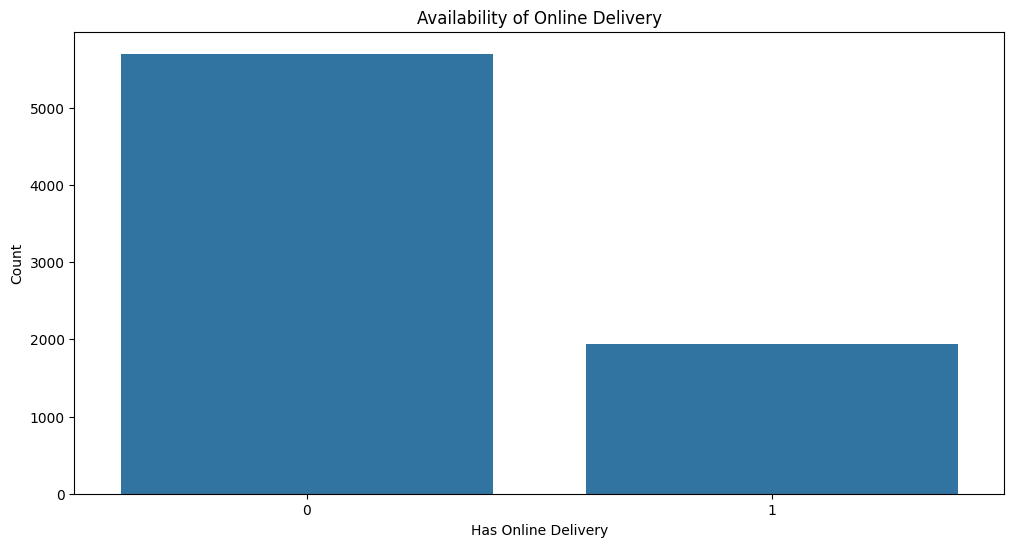

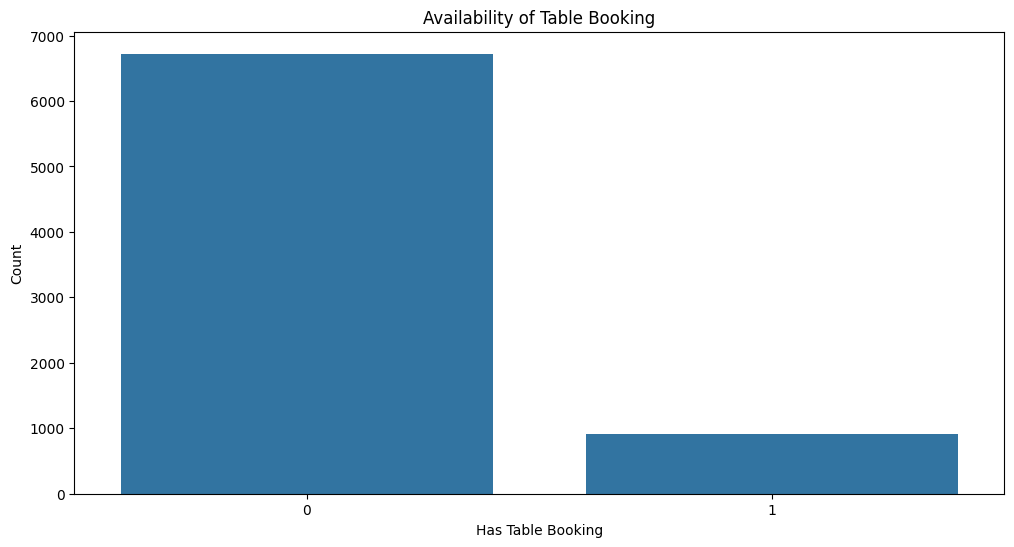

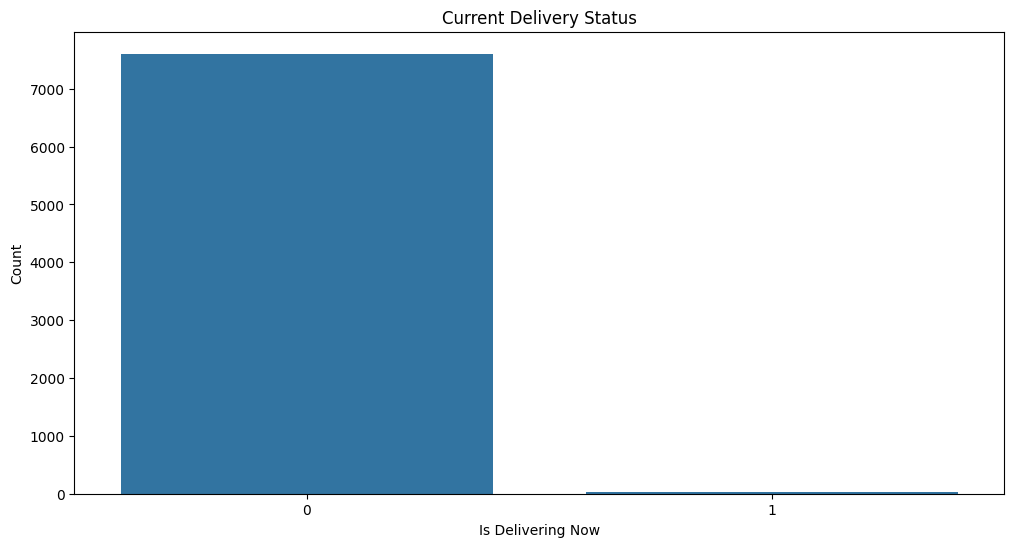

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Has Online delivery', data=train_df)
plt.title('Availability of Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Has Table booking', data=train_df)
plt.title('Availability of Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Is delivering now', data=train_df)
plt.title('Current Delivery Status')
plt.xlabel('Is Delivering Now')
plt.ylabel('Count')
plt.show()


Top most Cuisines

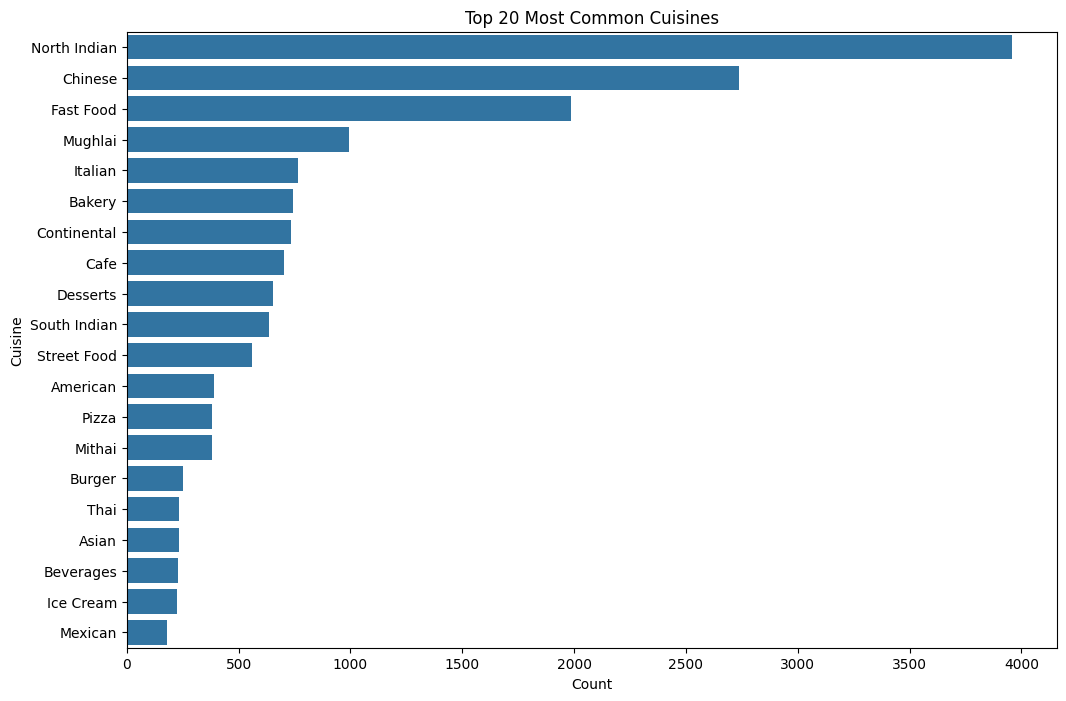

In [61]:
from collections import Counter

cuisines_list = df['Cuisines'].str.split(',').explode().str.strip()
cuisine_counts = Counter(cuisines_list)
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Cuisine', data=cuisine_df.sort_values(by='Count', ascending=False).head(20))
plt.title('Top 20 Most Common Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()


<ipython-input-62-481e80cfee1b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Cuisine', data=top_20_cuisines, palette=palette, edgecolor='w')


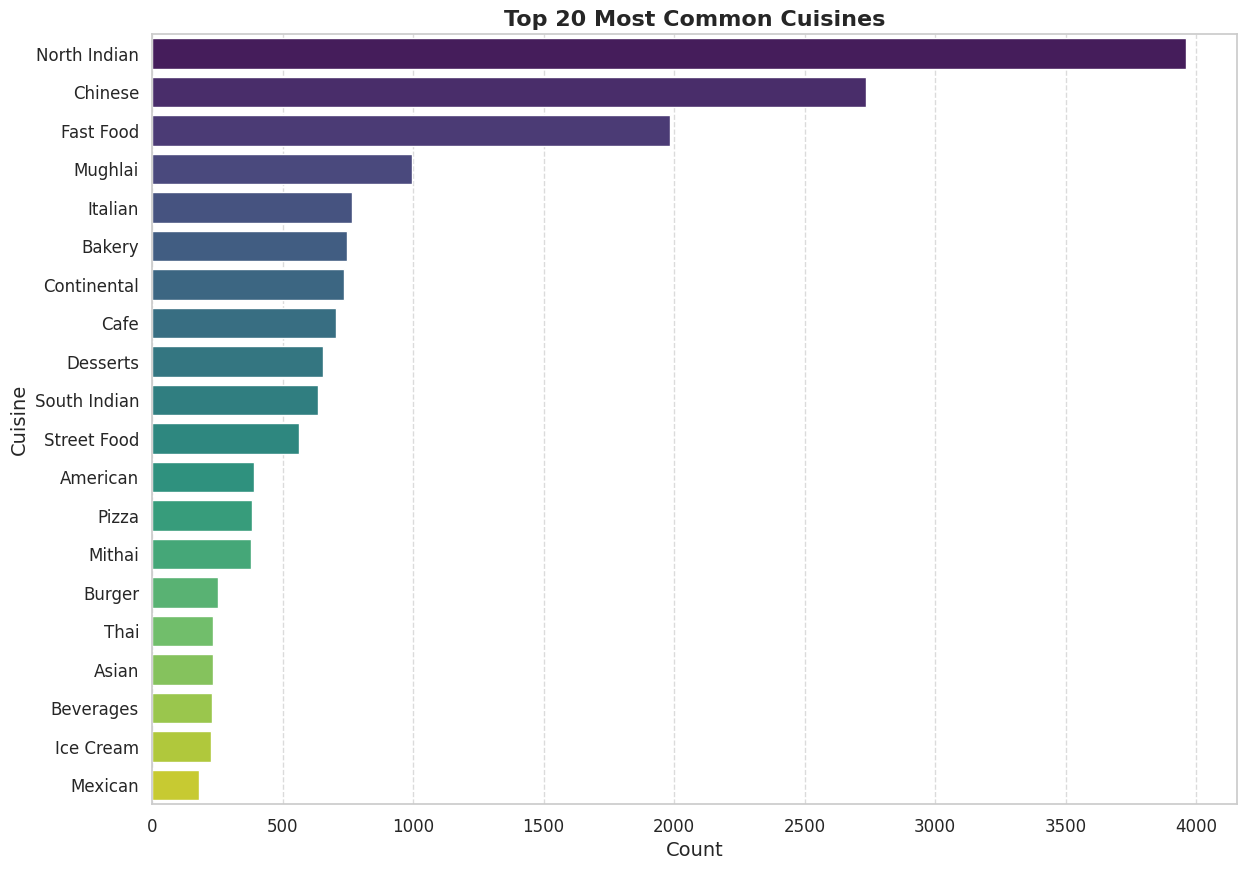

In [62]:
cuisines_list = df['Cuisines'].str.split(',').explode().str.strip()
cuisine_counts = Counter(cuisines_list)
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
top_20_cuisines = cuisine_df.sort_values(by='Count', ascending=False).head(20)

palette = sns.color_palette("viridis", n_colors=20)

sns.barplot(x='Count', y='Cuisine', data=top_20_cuisines, palette=palette, edgecolor='w')

plt.title('Top 20 Most Common Cuisines', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Rating by Country

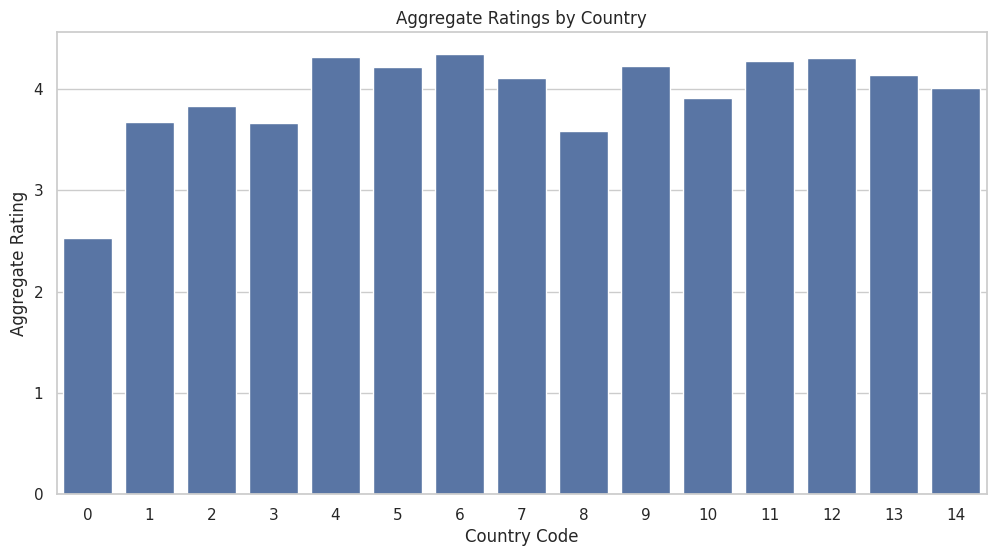

In [63]:
plt.figure(figsize=(12, 6))
country_rating = train_df.groupby('Country Code Encoded')['Aggregate rating'].mean().reset_index()
sns.barplot(x='Country Code Encoded', y='Aggregate rating', data=country_rating)
plt.title('Aggregate Ratings by Country')
plt.xlabel('Country Code')
plt.ylabel('Aggregate Rating')
plt.show()


## Correlations

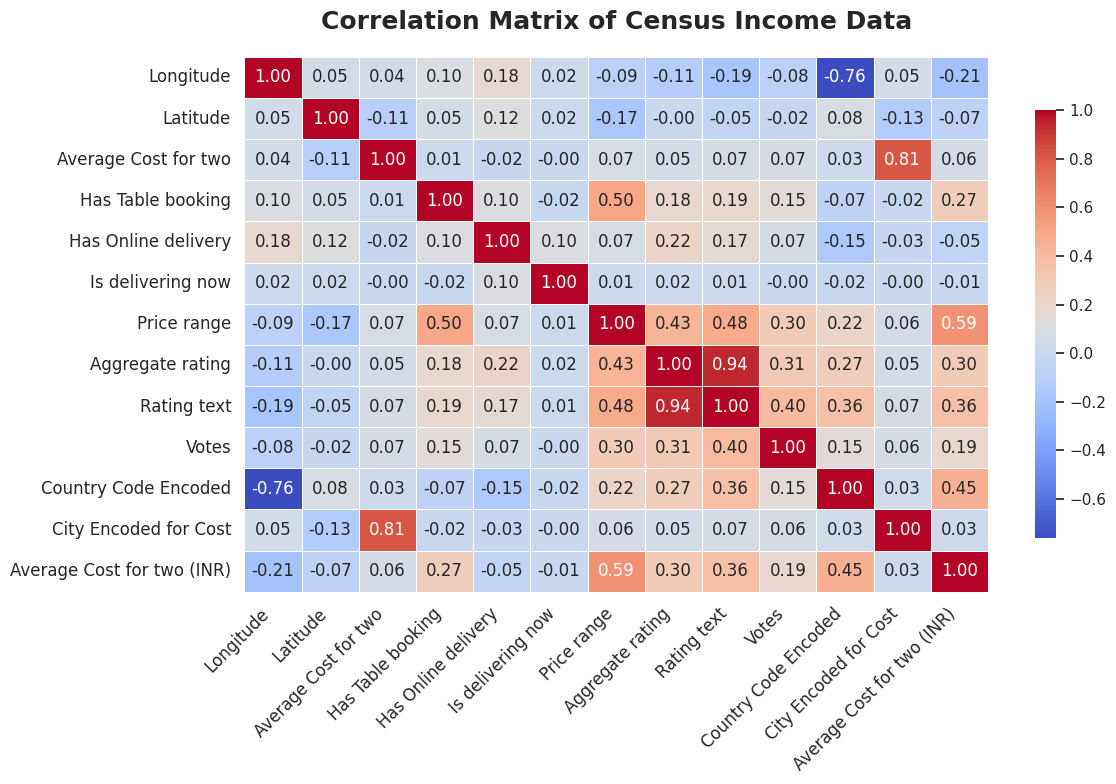

In [64]:
corr_matrix = train_df.drop('Cuisines', axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Census Income Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Comments - Since Aggregate Rating and Rating text have a high collinearity we will get rid of Rating text column since Aggregate Rating is continuous column and thereby provides more concise data.

In [65]:
train_df.drop('Rating text', axis=1, inplace=True)

In [66]:
test_df.drop('Rating text', axis=1, inplace=True)

Also we don't need average cost anymore so we will get rid of that too.

In [67]:
train_df.drop('Average Cost for two', axis=1, inplace=True)

In [68]:
test_df.drop('Average Cost for two', axis=1, inplace=True)

We will drop the Cuisine Column as well for now as including it will cause extremely big data.

In [69]:
train_df.drop('Cuisines', axis=1, inplace=True)

In [70]:
test_df.drop('Cuisines', axis=1, inplace=True)

## Skewness (Analysis to predict average cost form two)

In [71]:
train_df.skew()

,0
Longitude,-2.816522
Latitude,-3.095518
Has Table booking,2.348701
Has Online delivery,1.134287
Is delivering now,16.727738
Price range,0.899197
Aggregate rating,-0.954230
Votes,8.710192
Country Code Encoded,3.276350
City Encoded for Cost,21.810987


In [72]:
train_df['Votes'] = np.log1p(train_df['Votes'])
train_df['Aggregate rating'] = np.log1p(train_df['Aggregate rating'])
train_df['City Encoded for Cost'] = np.log1p(train_df['City Encoded for Cost'])

In [73]:
test_df['Votes'] = np.log1p(test_df['Votes'])
test_df['Aggregate rating'] = np.log1p(test_df['Aggregate rating'])
test_df['City Encoded for Cost'] = np.log1p(test_df['City Encoded for Cost'])

## Splitting the data into X_train, y_train, X_test, y_test

In [74]:
X_train_AC  = train_df.drop('Average Cost for two (INR)', axis=1)
y_train_AC = train_df['Average Cost for two (INR)']

In [75]:
X_test_AC = test_df.drop('Average Cost for two (INR)', axis=1)
y_test_AC = test_df['Average Cost for two (INR)']

## Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_AC = scaler.fit_transform(X_train_AC)
X_test_scaled_AC = scaler.transform(X_test_AC)

## PCA

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X_train_pca_AC = pca.fit_transform(X_train_scaled_AC)
X_test_pca_AC = pca.transform(X_test_scaled_AC)

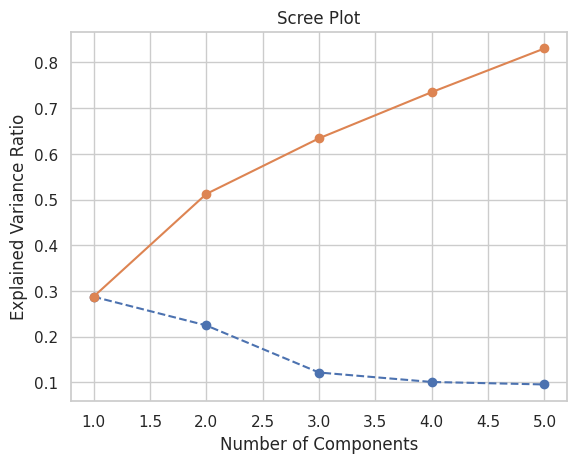

In [78]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Models

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_pca_AC, y_train_AC)

y_pred = lr.predict(X_test_pca_AC)

mae = mean_absolute_error(y_test_AC, y_pred)
mse = mean_squared_error(y_test_AC, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_AC, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 434.65062055193147
Mean Squared Error: 2478084.241762869
Root Mean Squared Error: 1574.1932034419629
R-squared: 0.2329610176640342


In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_pca_AC)
X_poly_test = poly_features.transform(X_test_pca_AC)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train_AC)

y_poly_pred = poly_reg.predict(X_poly_test)

mae = mean_absolute_error(y_test_AC, y_poly_pred)
mse = mean_squared_error(y_test_AC, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_AC, y_poly_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 314.05640153293905
Mean Squared Error: 2050138.619072291
Root Mean Squared Error: 1431.830513389169
R-squared: 0.3654226060926018


In [81]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_depth = 100,
                            min_samples_split = 2, random_state=42)
rfr.fit(X_train_pca_AC, y_train_AC)

y_pred = rfr.predict(X_test_pca_AC)

mae = mean_absolute_error(y_test_AC, y_pred)
mse = mean_squared_error(y_test_AC, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_AC, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 228.37627081050647
Mean Squared Error: 876673.8469853706
Root Mean Squared Error: 936.3086280630819
R-squared: 0.7286440048729539


In [384]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def lr_schedule(epoch, lr):
    initial_lr = 0.001
    decay = 0.1
    return initial_lr / (1 + decay * epoch)

early_stopping = EarlyStopping(
    monitor='val_mae',
    mode='min',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_mae',
                                    save_best_only=True,
                                    mode='min')

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

In [385]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_pca_AC.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='MSE',
              metrics=['mae'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_125 (Dense)                    │ (None, 512)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,529 (681.75 KB)

 Trainable params: 173,249 (676.75 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [386]:
history = model.fit(X_train_pca_AC, y_train_AC,
                    validation_split = 0.1,
                    epochs=100, batch_size=32, callbacks = [lr_scheduler, model_checkpoint])



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2360124.5000 - mae: 822.8719 - val_loss: 904556.0000 - val_mae: 477.1102 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009090909090909091.
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1266627.0000 - mae: 434.4937 - val_loss: 526177.8125 - val_mae: 311.6357 - learning_rate: 9.0909e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008333333333333334.
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 777211.9375 - mae: 350.7740 - val_loss: 448574.1250 - val_mae: 304.8394 - learning_rate: 8.3333e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007692307692307692.
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1182476.8750 - mae: 395.2425 - val_loss: 441369.8750 - val_mae: 286.8923 - learning_rate: 7.6923e-04

Epoch 5: LearningRateScheduler setting learning ra

In [387]:
test_loss, test_accuracy = model.evaluate(X_test_pca_AC, y_test_AC)

print(f'Test MAE: {test_accuracy:.4f}')


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1081727.7500 - mae: 267.2971
Test MAE: 270.5772


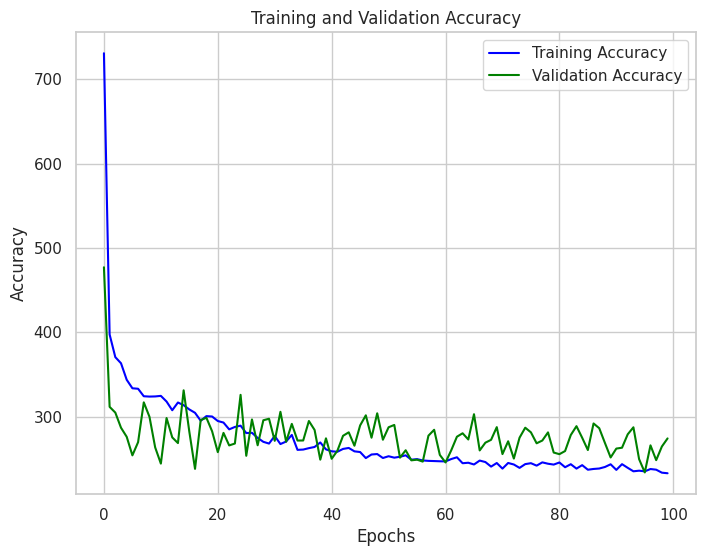

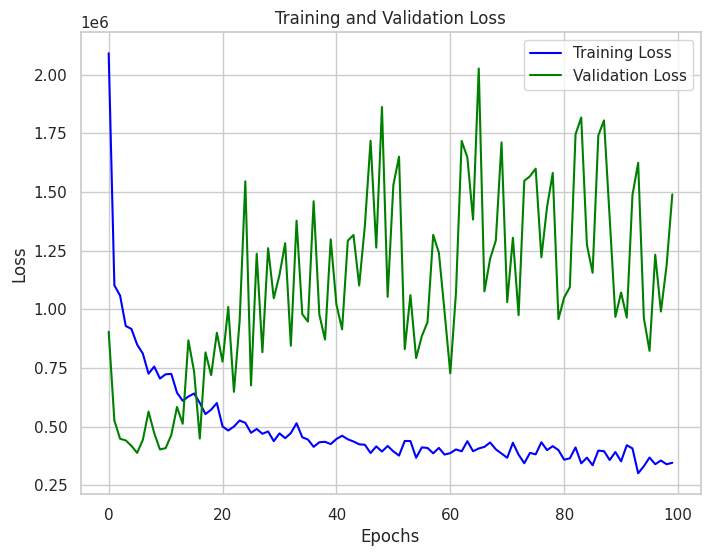

In [388]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_mae'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

The best model was Random Forest with an MAE of around 228.